In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import butter, lfilter, freqz,detrend
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy import constants
#sns.set_theme()
import re
import utils
from scipy import ndimage
from scipy.signal import lfilter
import utils

In [51]:
no_reflector = "felttest1/Record_2022-09-27_14-34-48/Record_2022-09-27_14-34-48.bin"
best_restult = "felttest1/Record_2022-09-27_14-14-14/Record_2022-09-27_14-14-14.bin"
munkholm = "felttest2/Record_2022-09-28_15-13-15/Record_2022-09-28_15-13-15.bin"
ali = "felttest2/Record_2022-09-28_14-48-46/Record_2022-09-28_14-48-46.bin"
try:
    #with open("felttest2/Record_2022-09-28_14-48-46/Record_2022-09-28_14-48-46.bin", "rb") as f:
    #with open("Record_2022-09-28_15-13-15.bin", "rb") as f:
    with open(munkholm, "rb") as f:

        data = f.read()
    
        
        
except IOError as e:
    print(e)

In [53]:
stri = "DONE"
done = False
data_arr = []
index = 0
data_bytes = data
while(not done):
    ls = re.search(stri.encode(), data_bytes).end()
    data_arr.append(data_bytes[:ls])
    data_bytes = data_bytes[ls+4:]
    print(len(data_bytes))
    if(len(data_bytes) == 0):
        done = True

292916792
291867276
290817764
289768228
288718768
287669332
286619884
285570448
284520964
283471416
282421840
281372252
280322640
279273168
278223768
277174416
276125028
275075580
274026084
272976492
271926948
270877320
269827672
268778140
267728536
266678908
265629280
264579508
263529896
262480044
261430240
260380304
259330176
258280084
257229848
256179840
255129800
254079820
253029840
251979804
250929680
249879684
248829712
247779672
246729452
245679384
244629344
243579284
242529604
241479868
240430272
239380556
238330728
237281092
236231384
235181344
234131472
233081660
232031428
230981088
229931288
228881656
227831984
226782444
225732800
224683036
223633164
222583292
221533564
220483716
219433932
218384188
217334524
216284904
215235020
214185172
213135236
212085196
211035120
209985288
208935328
207885580
206835580
205785804
204735940
203685992
202636068
201586180
200536376
199486476
198436636
197386640
196336440
195286504
194236520
193186416
192136400
191085892
190035920
188985828


# Seperate RADC and MRDM


In [54]:
MRDM = []
RADC = []
for i,frame in enumerate(data_arr):
        length = int.from_bytes(
                 frame[4:8], byteorder="little", signed=False)
        data_RADC = frame[8:8+length]
        data_RADC = np.frombuffer(data_RADC,dtype=np.uint16)
        RADC.append(data_RADC)
        length_MRDM = int.from_bytes(
                    frame[8+length+4:8+length+8], byteorder="little", signed=False)
        #print(8*2+length+length_MRDM -8+length+8*2 )
        data_MRDM = frame[8+length+8:8*2+length+length_MRDM]
        data_MRDM = np.frombuffer(data_MRDM,dtype=np.uint32)
        MRDM.append(np.flip(ndimage.rotate(data_MRDM.reshape(256,256),90),axis = 0))

/Users/sondreolimb/prosjektOppgave/ProjectReportCode/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(256, 256)


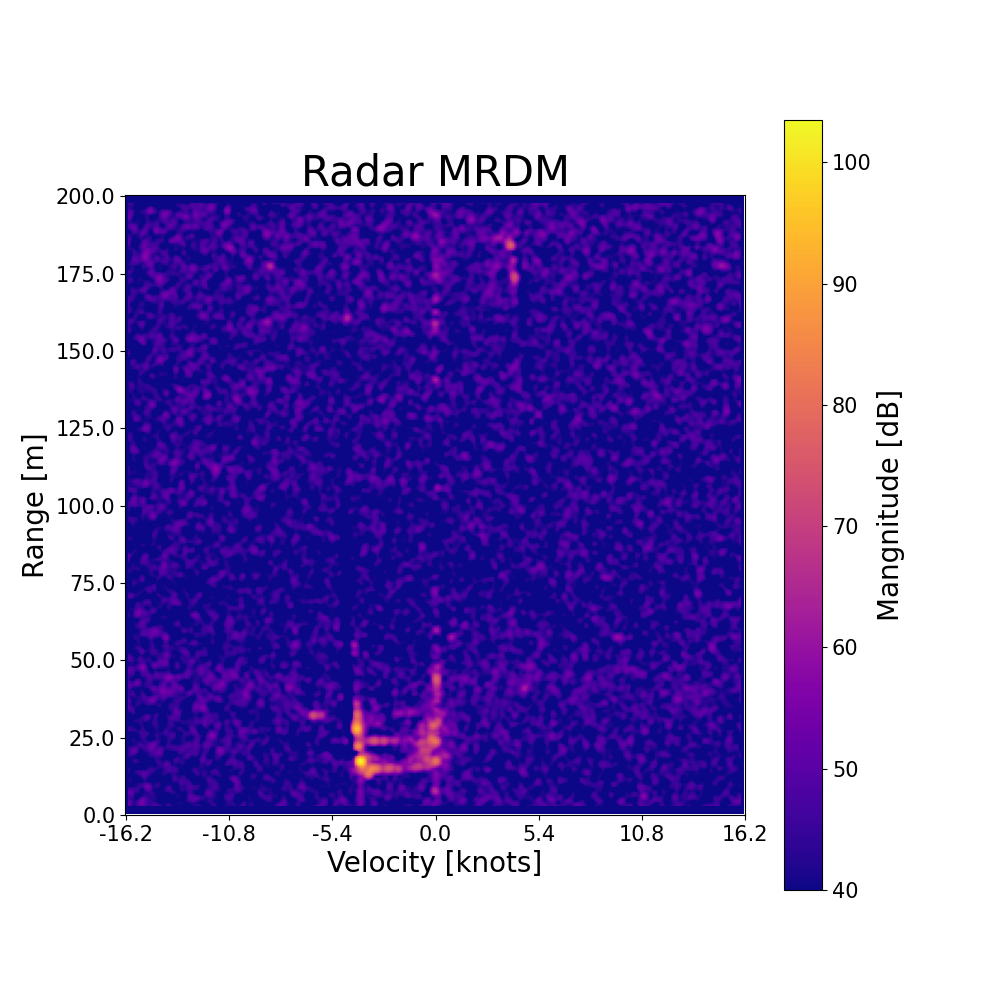

In [77]:
#%matplotlib ipympl
labels = {
    "x_label":"Velocity [knots]",
    "y_label":"Range [m]",
    "title": "Radar MRDM"

}
#data_fft_plot = cv2.GaussianBlur(np.abs(data_ma), (3, 3),sigmaX=1,sigmaY=1)
#data_fft_plot = ndimage.gaussian_filter(data_fft_plot,sigma=1,mode=mode)
#sns.set(rc={'figure.figsize':(20,15)})

#test = np.max(np.abs(MRDM[:500]),axis=0)
test = MRDM[200]
test[test < 1]=1
plt.figure(figsize=(10,10))
print(np.shape(test))
#test[test>40] =0
rotated_img = ndimage.rotate(test,90)
#rotated_img = np.flip(test,axis=0)
rotated_img =20*np.log10(np.abs(rotated_img)) # We rotate the image so the x axis is the velocity


#rotated_img = cv2.GaussianBlur(rotated_img, (3, 3),sigmaX=1,sigmaY=1)
#plt.imshow(rotated_img,cmap="plasma", vmin=plot_min_doppler,vmax=plot_max_doppler)
plt.imshow(rotated_img,cmap="plasma", vmin=40)
# rms = 10*np.log(np.sqrt(np.mean(np.abs(rotated_img[130:135,80:100])**2)))
# peak = 10*np.log(np.abs(rotated_img[137,87]))
# snr = peak-rms
# print("Peak:",peak)
# print("Side loab:", 10*np.log(np.abs(rotated_img[137,85])))
# print("RMS:",rms)
# print("SNR:",snr) 
#plt.xlim(80,94)
plt.yticks(np.linspace(0,256,9),labels=np.round(np.linspace(255*0.785277,0,9)),size =15)



plt.xticks(np.linspace(0,256,7),labels=np.round(np.linspace(-0.127552440715*127,0.127552440715*127,7),2),size =15)
cbar  = plt.colorbar()
cbar.set_label('Mangnitude [dB]',fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=15) 
plt.xlabel(labels["x_label"],fontdict = {'fontsize' : 20})
plt.ylabel(labels["y_label"],fontdict = {'fontsize' : 20})
plt.title(labels["title"],fontdict = {'fontsize' : 30})
plt.grid(False)
#plt.savefig("plots/results/radar_MRDM.svg",format="svg")

23058
23058


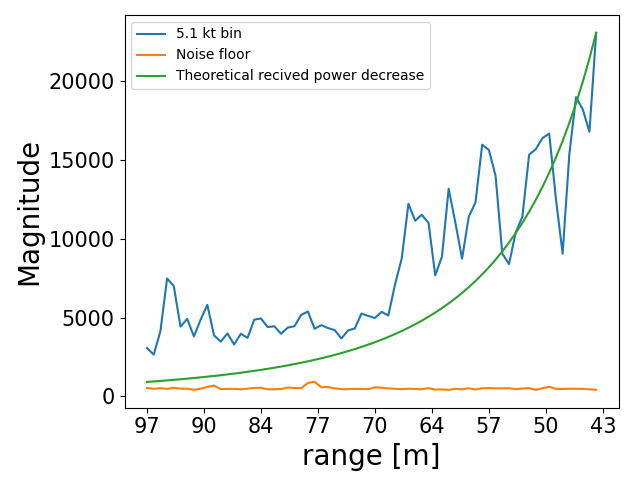

In [44]:
plt.figure()
start_bin =132
end_bin = 200

detections =np.max(np.abs(MRDM),axis=0)
detections  = ndimage.rotate(detections,90)
detection_line = np.abs(np.max(detections[start_bin:end_bin,91:94],axis=1))
#detection_line = np.abs(detections[start_bin:end_bin,87])

r = np.linspace((255-start_bin)*0.785277,(255-end_bin)*0.785277,len(detection_line))
print(max(detection_line))
r_squared =max(detection_line)/(r/((255-end_bin)*0.785277))**4
print(max(detection_line))
plt.plot(detection_line,label="5.1 kt bin")
plt.plot(np.abs(detections[start_bin:end_bin,50]),label="Noise floor")

plt.plot(r_squared,label="Theoretical recived power decrease")

plt.legend()
#plt.title("",size=25)
#plt.xticks(np.linspace(0,157,1),labels=np.round(np.linspace(-0.127552440715*127,0.127552440715*127,7),2),size=15)
plt.yticks(size=15)
plt.xlabel("range [m]",size=20)
plt.ylabel("Magnitude",size=20)
plt.tight_layout()
plt.xticks(np.linspace(0,len(detection_line),9),labels=np.int16(np.linspace((256-start_bin)*0.785277,(256-end_bin)*0.785277,9)),size =15)
plt.savefig("plots/results/MRDM_falloff_ali.png")
plt.show()

In [93]:
center_deleted = []
for i ,frame in enumerate(MRDM):
    frame[124:132] = 1
    center_deleted.append(frame)

In [12]:
#%matplotlib ipympl
labels = {
    "x_label":"Velocity [knots]",
    "y_label":"Range [m]",
    "title": "Radar MRDM"

}
#data_fft_plot = cv2.GaussianBlur(np.abs(data_ma), (3, 3),sigmaX=1,sigmaY=1)
#data_fft_plot = ndimage.gaussian_filter(data_fft_plot,sigma=1,mode=mode)
#sns.set(rc={'figure.figsize':(20,15)})

test = np.max(np.abs(center_deleted[:500]),axis=0)
plt.figure(figsize=(10,10))
print(np.shape(test))
#test[test>40] =0
rotated_img = ndimage.rotate(test,90)
#rotated_img = np.flip(test,axis=0)
rotated_img =20*np.log10(np.abs(rotated_img)) # We rotate the image so the x axis is the velocity


#rotated_img = cv2.GaussianBlur(rotated_img, (3, 3),sigmaX=1,sigmaY=1)
#plt.imshow(rotated_img,cmap="plasma", vmin=plot_min_doppler,vmax=plot_max_doppler)
plt.imshow(rotated_img,cmap="plasma")
# rms = 10*np.log(np.sqrt(np.mean(np.abs(rotated_img[130:135,80:100])**2)))
# peak = 10*np.log(np.abs(rotated_img[137,87]))
# snr = peak-rms
# print("Peak:",peak)
# print("Side loab:", 10*np.log(np.abs(rotated_img[137,85])))
# print("RMS:",rms)
# print("SNR:",snr) 
#plt.xlim(80,94)
plt.yticks(np.linspace(0,256,9),labels=np.round(np.linspace(255*0.785277,0,9)),size =15)



plt.xticks(np.linspace(0,256,7),labels=np.round(np.linspace(-0.127552440715*127,0.127552440715*127,7),2),size =15)
cbar  = plt.colorbar()
cbar.set_label('Mangnitude [dB]',fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=15) 
plt.xlabel(labels["x_label"],fontdict = {'fontsize' : 20})
plt.ylabel(labels["y_label"],fontdict = {'fontsize' : 20})
plt.title(labels["title"],fontdict = {'fontsize' : 30})
plt.grid(False)
#plt.savefig("plots/results/radar_MRDM.svg",format="svg")

NameError: name 'center_deleted' is not defined

In [95]:
cfar_array_deleted= []
SNR_array_deleted = []
SNR_D_array_deleted = []
length_data_diff = len(MRDM[100:700])
for i,img in enumerate( MRDM[100:700]):
    cfar ,y,SNR,d = utils.CFAR_2D(img,10, 15, 0.000001,plot=False, iso_axis=True)
    cfar_array_deleted.append(cfar)
    SNR_array_deleted.append(SNR)
    SNR_D_array_deleted.append(y)
    print(np.round(i/length_data_diff*100,1))

traning area 2160
0.0
traning area 2160
0.2
traning area 2160
0.3
traning area 2160
0.5
traning area 2160
0.7
traning area 2160
0.8
traning area 2160
1.0
traning area 2160
1.2
traning area 2160
1.3
traning area 2160
1.5
traning area 2160
1.7
traning area 2160
1.9
traning area 2160
2.0
traning area 2160
2.2
traning area 2160
2.4
traning area 2160
2.5
traning area 2160
2.7
traning area 2160
2.9
traning area 2160
3.0
traning area 2160
3.2
traning area 2160
3.4
traning area 2160
3.5
traning area 2160
3.7
traning area 2160
3.9
traning area 2160
4.0
traning area 2160
4.2
traning area 2160
4.4
traning area 2160
4.6
traning area 2160
4.7
traning area 2160
4.9
traning area 2160
5.1
traning area 2160
5.2
traning area 2160
5.4
traning area 2160
5.6
traning area 2160
5.7
traning area 2160
5.9
traning area 2160
6.1
traning area 2160
6.2
traning area 2160
6.4
traning area 2160
6.6
traning area 2160
6.7
traning area 2160
6.9
traning area 2160
7.1
traning area 2160
7.3
traning area 2160
7.4
traning ar

In [47]:
cfar_array= []
SNR_array = []
SNR_D_array = []
length_data_diff = len(MRDM[:500])
for i,img in enumerate( MRDM[:500]):
    cfar ,y,SNR,d = utils.CFAR_2D(img,10, 15, 0.000001,plot=False, iso_axis=True)
    cfar_array.append(cfar)
    SNR_array.append(SNR)
    SNR_D_array.append(y)
    print(np.round(i/length_data_diff*100,1))

traning area 2160
0.0
traning area 2160
0.2
traning area 2160
0.4
traning area 2160
0.6
traning area 2160
0.8
traning area 2160
1.0
traning area 2160
1.2
traning area 2160
1.4
traning area 2160
1.6
traning area 2160
1.8
traning area 2160
2.0
traning area 2160
2.2
traning area 2160
2.4
traning area 2160
2.6
traning area 2160
2.8
traning area 2160
3.0
traning area 2160
3.2
traning area 2160
3.4
traning area 2160
3.6
traning area 2160
3.8
traning area 2160
4.0
traning area 2160
4.2
traning area 2160
4.4
traning area 2160
4.6
traning area 2160
4.8
traning area 2160
5.0
traning area 2160
5.2
traning area 2160
5.4
traning area 2160
5.6
traning area 2160
5.8
traning area 2160
6.0
traning area 2160
6.2
traning area 2160
6.4
traning area 2160
6.6
traning area 2160
6.8
traning area 2160
7.0
traning area 2160
7.2
traning area 2160
7.4
traning area 2160
7.6
traning area 2160
7.8
traning area 2160
8.0
traning area 2160
8.2
traning area 2160
8.4
traning area 2160
8.6
traning area 2160
8.8
traning ar

(256, 256)


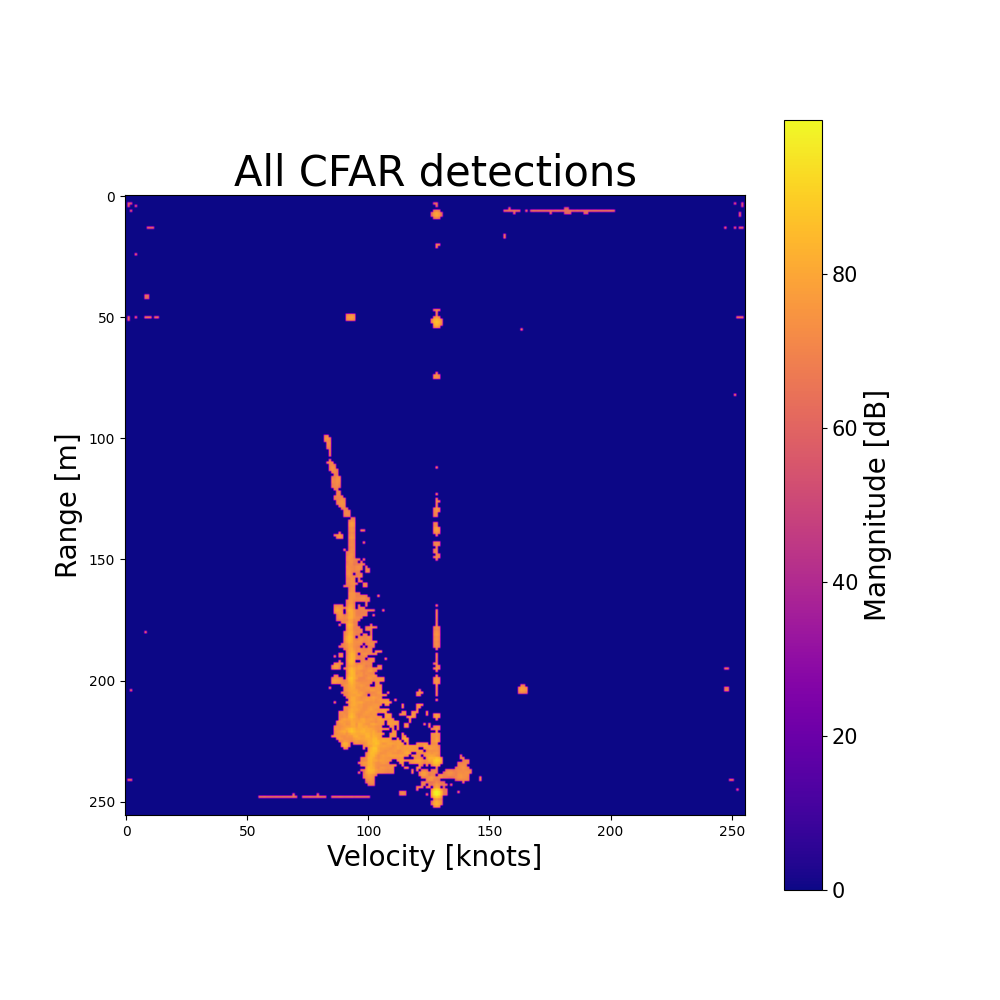

In [48]:
%matplotlib ipympl
labels = {
    "x_label":"Velocity [knots]",
    "y_label":"Range [m]",
    "title": "All CFAR detections"

}
#data_fft_plot = cv2.GaussianBlur(np.abs(data_ma), (3, 3),sigmaX=1,sigmaY=1)
#data_fft_plot = ndimage.gaussian_filter(data_fft_plot,sigma=1,mode=mode)
#sns.set(rc={'figure.figsize':(20,15)})

test = np.max(np.abs(cfar_array),axis=0)
plt.figure(figsize=(10,10))
print(np.shape(test))
#test[test>40] =0

rotated_img =20*np.log10(np.abs(test)) # We rotate the image so the x axis is the velocity
#
#rotated_img = cv2.GaussianBlur(rotated_img, (3, 3),sigmaX=1,sigmaY=1)
#plt.imshow(rotated_img,cmap="plasma", vmin=plot_min_doppler,vmax=plot_max_doppler)
plt.imshow(rotated_img,cmap="plasma",vmin=0)
# rms = 10*np.log(np.sqrt(np.mean(np.abs(rotated_img[130:135,80:100])**2)))
# peak = 10*np.log(np.abs(rotated_img[137,87]))
# snr = peak-rms
# print("Peak:",peak)
# print("Side loab:", 10*np.log(np.abs(rotated_img[137,85])))
# print("RMS:",rms)
# print("SNR:",snr) 
#plt.xlim(80,94)
#plt.yticks(np.linspace(0,256,9),labels=np.round(np.linspace(255*0.785277,0,9)),size =15)



#plt.xticks(np.linspace(0,256,7),labels=np.round(np.linspace(-0.127552440715*127,0.127552440715*127,7),2),size =15)
cbar  = plt.colorbar()
cbar.set_label('Mangnitude [dB]',fontdict = {'fontsize' : 20})
cbar.ax.tick_params(labelsize=15) 
plt.xlabel(labels["x_label"],fontdict = {'fontsize' : 20})
plt.ylabel(labels["y_label"],fontdict = {'fontsize' : 20})
plt.title(labels["title"],fontdict = {'fontsize' : 30})
plt.grid(False)
plt.savefig("plots/results/ali_MRDM_all_cfar.png",format="png")

9.067535531927865
9.067535531927865


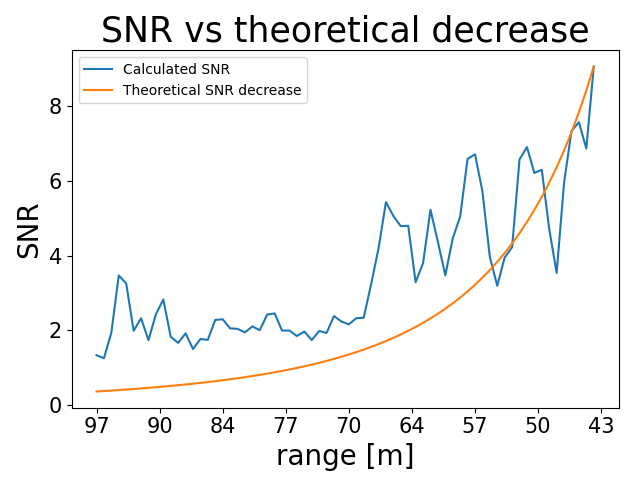

In [50]:
plt.figure()
start_bin =132
end_bin = 200

detections =np.max(np.abs(SNR_D_array),axis=0)
#detections  = ndimage.rotate(detections,90)
detection_line = np.abs(np.max(detections[start_bin:end_bin,87:108],axis=1))
#detection_line = np.abs(detections[start_bin:end_bin,87])

r = np.linspace((255-start_bin)*0.785277,(255-end_bin)*0.785277,len(detection_line))
print(max(detection_line))
r_squared =max(detection_line)/(r/((255-end_bin)*0.785277))**4
print(max(detection_line))
plt.plot(detection_line,label="Calculated SNR")

plt.plot(r_squared,label="Theoretical SNR decrease")

plt.legend()
plt.title("SNR vs theoretical decrease",size=25)
#plt.xticks(np.linspace(0,157,1),labels=np.round(np.linspace(-0.127552440715*127,0.127552440715*127,7),2),size=15)
plt.yticks(size=15)
plt.xlabel("range [m]",size=20)
plt.ylabel("SNR",size=20)
plt.tight_layout()
plt.xticks(np.linspace(0,len(detection_line),9),labels=np.int16(np.linspace((256-start_bin)*0.785277,(256-end_bin)*0.785277,9)),size =15)
plt.savefig("plots/results/SNR_vs_falloff_MRDM_ali.png")
plt.show()